<a href="https://colab.research.google.com/github/ayushbhotika/stockMarketPrediction/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/SP_500.csv')
display(df.head())

,Date,Close
0,29-06-2015,2057.639893
1,30-06-2015,2063.110107
2,1/7/2015,2077.419922
3,2/7/2015,2076.780029
4,6/7/2015,2068.760010


In [ ]:
display(df.isnull().sum())

,0
Date,0
Close,0


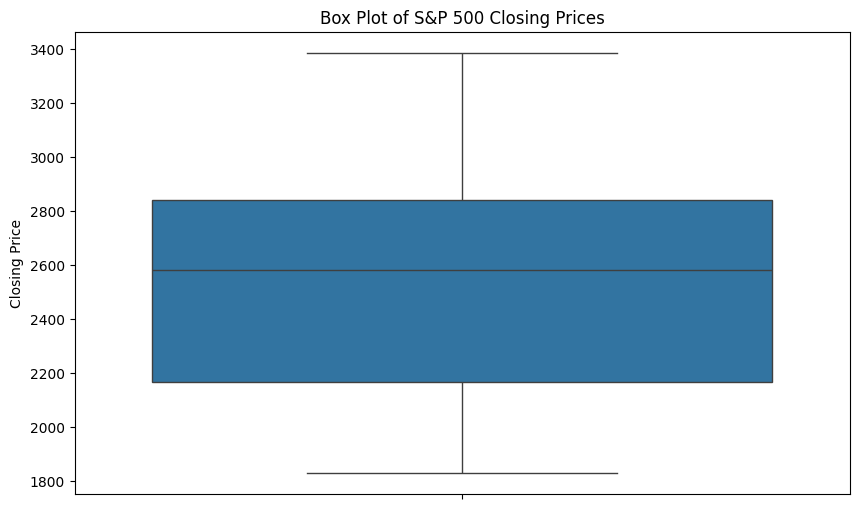

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Close'])
plt.title('Box Plot of S&P 500 Closing Prices')
plt.ylabel('Closing Price')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(df['Close'])

# Extract and print the results
print('ADF Statistic: %f' % adf_test[0])
print('P-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test[1] <= 0.05:
    print("\nConclusion: The time series is likely stationary (reject the null hypothesis).")
else:
    print("\nConclusion: The time series is likely non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.491562
P-value: 0.537681
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568

Conclusion: The time series is likely non-stationary (fail to reject the null hypothesis).


In [ ]:
# Calculate the first-order difference of the 'Close' price
df['close_diff'] = df['Close'].diff()

# Display the head of the DataFrame with the new differenced column
display(df.head())

# Perform the Augmented Dickey-Fuller test on the differenced series
# Drop the first NaN value resulting from differencing
adf_test_diff = adfuller(df['close_diff'].dropna())

# Extract and print the results for the differenced series
print('\nADF Statistic for Differenced Series: %f' % adf_test_diff[0])
print('P-value for Differenced Series: %f' % adf_test_diff[1])
print('Critical Values for Differenced Series:')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results for the differenced series
if adf_test_diff[1] <= 0.05:
    print("\nConclusion: The differenced time series is likely stationary (reject the null hypothesis).")
else:
    print("\nConclusion: The differenced time series is likely non-stationary (fail to reject the null hypothesis).")

,Date,Close,close_diff
0,29-06-2015,2057.639893,NaN
1,30-06-2015,2063.110107,5.470214
2,1/7/2015,2077.419922,14.309815
3,2/7/2015,2076.780029,-0.639893
4,6/7/2015,2068.760010,-8.020019



ADF Statistic for Differenced Series: -10.320537
P-value for Differenced Series: 0.000000
Critical Values for Differenced Series:
	1%: -3.436
	5%: -2.864
	10%: -2.568

Conclusion: The differenced time series is likely stationary (reject the null hypothesis).


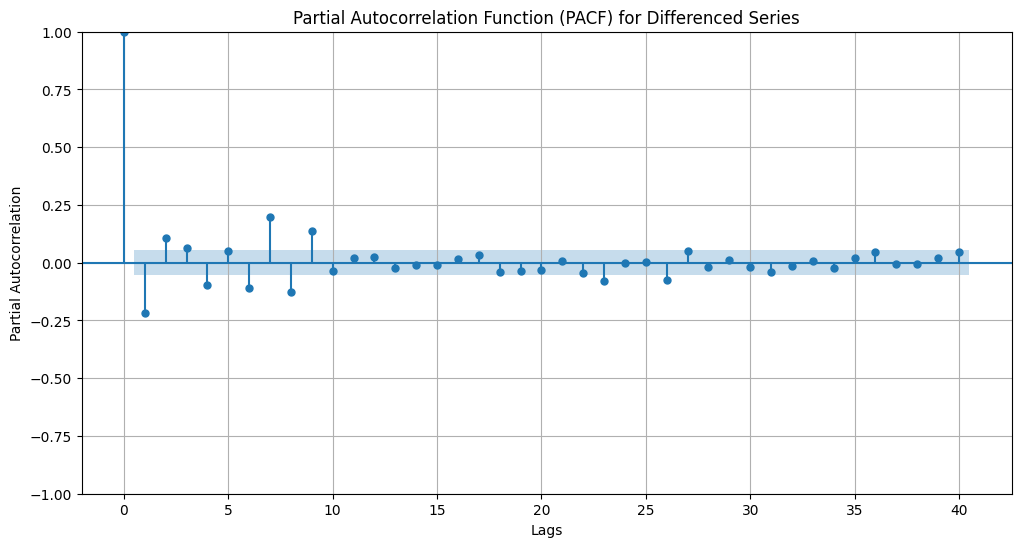

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Plot the PACF of the first-order differenced series
# Drop the first NaN value before plotting
plt.figure(figsize=(12, 6))
plot_pacf(df['close_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Differenced Series')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

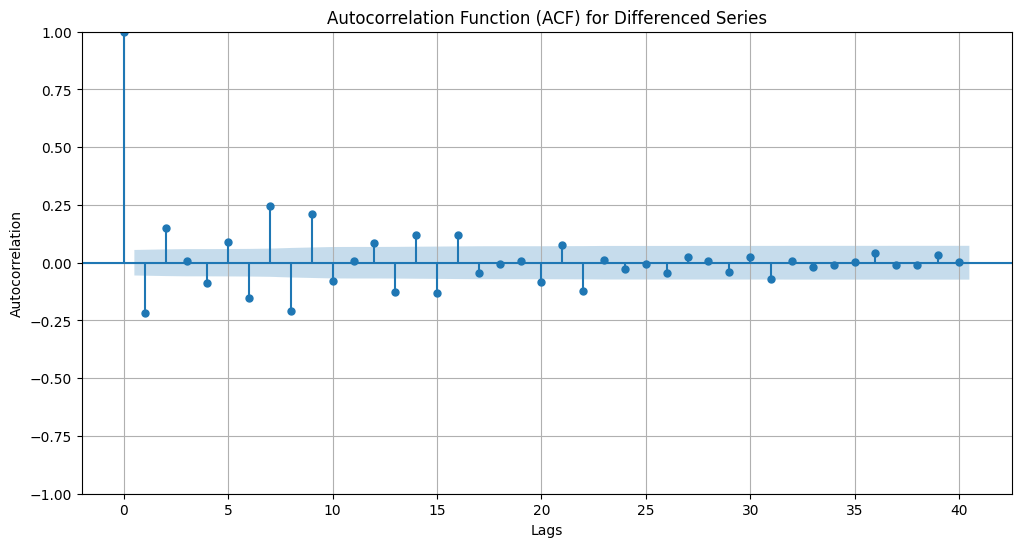

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot the ACF of the first-order differenced series
# Drop the first NaN value before plotting
plt.figure(figsize=(12, 6))
plot_acf(df['close_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Differenced Series')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(1, 1, 1) model
# The order is (p, d, q) where:
# p is the order of the AR component
# d is the order of differencing
# q is the order of the MA component
arima_model = ARIMA(df['Close'], order=(1, 1, 1))
arima_results = arima_model.fit()

# Display the model summary
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6101.980
Date:                Wed, 03 Sep 2025   AIC                          12209.959
Time:                        09:17:34   BIC                          12225.371
Sample:                             0   HQIC                         12215.751
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4446      0.034    -12.919      0.000      -0.512      -0.377
ma.L1          0.2322      0.038      6.070      0.000       0.157       0.307
sigma2       956.3654     11.977     79.853      0.0

In [ ]:
%pip uninstall numpy -y

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
%pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
%pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
import pandas as pd

df = pd.read_csv('/content/SP_500.csv')
display(df.head())

,Date,Close
0,29-06-2015,2057.639893
1,30-06-2015,2063.110107
2,1/7/2015,2077.419922
3,2/7/2015,2076.780029
4,6/7/2015,2068.760010


In [ ]:
# Fit auto_arima to find the best ARIMA model parameters
# Using stepwise_fit=True for faster search
auto_arima_model = auto_arima(df['Close'], seasonal=False, stepwise=True,
                              suppress_warnings=True, error_action='ignore')

# Print the summary of the best ARIMA model found
print(auto_arima_model.summary())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -6044.775
Date:                Wed, 03 Sep 2025   AIC                          12101.549
Time:                        09:19:26   BIC                          12132.373
Sample:                             0   HQIC                         12113.133
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7060      0.029    -58.187      0.000      -1.763      -1.649
ar.L2         -0.8332      0.041    -20.219      0.000      -0.914      -0.752
ar.L3          0.0280      0.018      1.583      0.1

In [ ]:
# Forecast the next day's closing price using the auto_arima model
forecast = auto_arima_model.predict(n_periods=1)

print(f"Forecasted S&P 500 Closing Price for the next day: {forecast.iloc[0]:.2f}")

Forecasted S&P 500 Closing Price for the next day: 3028.15


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
